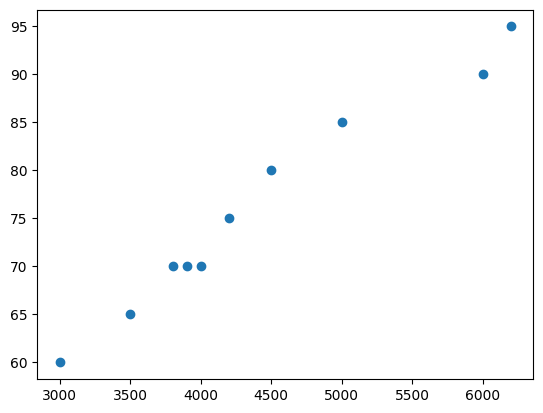

In [3]:
# 선형회귀(Linear Regression)

import pandas as pd
import matplotlib.pyplot as plt

# 연봉과 직장 만족도의 분석
x = [3000, 4200, 4000, 5000, 6000, 3800, 3500, 6200, 3900, 4500]
y = [60, 75, 70, 85, 90, 70, 65, 95, 70, 80]

data = {'x': x, 'y': y}
df = pd.DataFrame(data)
plt.scatter(df['x'], df['y'])
plt.show()

In [6]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('y ~ x', data=df).fit()   # 모델 생성
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     271.0
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.87e-07
Time:                        15:16:09   Log-Likelihood:                -20.111
No. Observations:                  10   AIC:                             44.22
Df Residuals:                       8   BIC:                             44.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0004      2.926      9.913      0.0

/home/ssam/PycharmProjects/BasicPython/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
# 연봉 이외의 어떤 요인이 직장 만족도에 영향을 미치는지 알아보기
salary = [3000, 4200, 4000, 5000, 6000, 3800, 3500, 6200, 3900, 4500]
break_time = [120, 60, 100, 100, 50, 120, 90, 40, 120, 120]
working_time = [8, 6, 10, 8, 10, 10, 9, 7, 8, 9]
company_satisfaction = [60, 75, 70, 85, 90, 70, 65, 95, 70, 80]

data = {'salary': salary, 'break_time': break_time, 'working_time': working_time, 'company_satisfaction': company_satisfaction}

df = pd.DataFrame(data)

fit = ols('company_satisfaction ~ salary + break_time + working_time', data=df).fit()
print(fit.summary())

                             OLS Regression Results                             
Dep. Variable:     company_satisfaction   R-squared:                       0.988
Model:                              OLS   Adj. R-squared:                  0.982
Method:                   Least Squares   F-statistic:                     164.0
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):           3.81e-06
Time:                          15:26:20   Log-Likelihood:                -15.777
No. Observations:                    10   AIC:                             39.55
Df Residuals:                         6   BIC:                             40.77
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.9819     

/home/ssam/PycharmProjects/BasicPython/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
import statsmodels.api as sm

sales = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
price = [1500, 2000, 5000, 3000, 3500, 2500, 4000, 4500, 3000, 4500, 4000, 4500, 5500, 6500, 5000, 3500, 7000]
data = {'sales': sales, 'price': price}
df = pd.DataFrame(data)

logis = sm.Logit.from_formula('sales ~ price', data=df).fit()
print(logis.summary())

Optimization terminated successfully.
         Current function value: 0.430873
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  sales   No. Observations:                   17
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.3768
Time:                        16:03:13   Log-Likelihood:                -7.3248
converged:                       True   LL-Null:                       -11.754
Covariance Type:            nonrobust   LLR p-value:                  0.002917
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5752      3.300      1.993      0.046       0.108      13.042
price         -0.0016      0.

In [9]:
logis.params

Intercept    6.575158
price       -0.001569
dtype: float64

In [10]:
import numpy as np

print(np.exp(logis.params))

Intercept    717.058841
price          0.998433
dtype: float64


In [12]:
# seaborn: matplotlib과 같은 그래프 그리는 라이브러리
import seaborn as sns
# seaborn에 자체적인 저장소(repository)가 존재하여 저장소로부터 직접 데이터를 가져올 수 있다.
titanic = sns.load_dataset('titanic') # 온라인에서 사용
# titanic = pd.read_csv('../chapter08/titanic.csv') #오프라인에서 사용
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(titanic['sex'])
sex = encoder.transform(titanic['sex'])
titanic['sex'] = sex
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
logit = sm.Logit.from_formula('survived ~ pclass + sex + age + fare + parch + sibsp', data=titanic).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.445244
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            6
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.3408
Time:                        16:23:47   Log-Likelihood:                -317.90
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 5.727e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3890      0.604      8.926      0.000       4.206       6.572
pclass        -1.2422      0.